# Analysis of NHL 2009-2018 Draft data

Dataset downloaded from [Kaggle](http://localhost:8888/?token=b1eb61f8ed72cf51005640919abafb625e74268313819ce3).

## Load data

In [152]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from glob import glob
from time import time
import os
sns.set()

In [153]:
draft_data_path = '../data/nhl-draft-picks-2009-2018/'
os.listdir(draft_data_path)

['2009.csv',
 '2010.csv',
 '2011.csv',
 '2012.csv',
 '2013.csv',
 '2014.csv',
 '2015.csv',
 '2016.csv',
 '2017.csv',
 '2018.csv']

In [154]:
t = time()
# glob all .csv files from NHL Draft data
pattern = '*.csv'
csv_files = glob(draft_data_path + pattern)

#  Iterate over csv_files
frames = []
for csv in csv_files:
    #  Read csv into a DataFrame: df
    df = pd.read_csv(csv)
    df['year'] = int(csv[-8:-4])
    # Append df to frames
    frames.append(df)
df = pd.concat(frames)
elapsed = time() - t
print("----- DataFrame with NHL Draft Data loaded"
      "\nin {0:.2f} seconds".format(elapsed) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(df.shape[0], df.shape[1]) + 
      "\n-- Column names:\n", df.columns)

----- DataFrame with NHL Draft Data loaded
in 0.49 seconds
with 2,119 rows
and 21 columns
-- Column names:
 Index(['Overall', 'Team', 'Player', 'Nat.', 'Pos', 'Age', 'To', 'Amateur Team',
       'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'GP.1', 'W', 'L', 'T/O', 'SV%',
       'GAA', 'year'],
      dtype='object')


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2119 entries, 0 to 216
Data columns (total 21 columns):
Overall         2119 non-null int64
Team            2119 non-null object
Player          2119 non-null object
Nat.            2118 non-null object
Pos             2118 non-null object
Age             2118 non-null float64
To              728 non-null float64
Amateur Team    2118 non-null object
GP              728 non-null float64
G               728 non-null float64
A               728 non-null float64
PTS             728 non-null float64
+/-             724 non-null float64
PIM             728 non-null float64
GP.1            55 non-null float64
W               54 non-null float64
L               54 non-null float64
T/O             54 non-null float64
SV%             55 non-null float64
GAA             55 non-null float64
year            2119 non-null int64
dtypes: float64(14), int64(2), object(5)
memory usage: 364.2+ KB


## New features

In [ ]:
num_teams = df.groupby('year')['Team'].nunique()
num_teams.name = 'num_teams'
df = pd.merge(df, num_teams, 
              right_on=num_teams.index,
              left_on='year')
print("New column 'num_teams' added to df.")

In [179]:
df['round_ratio'] = (df['Overall'] - 1)/ df['num_teams']
df['round'] = df['round_ratio'].astype('int') + 1
print("New columns 'round_ratio' and 'round' added to df.")

New columns 'round_ratio' and 'round' added to df.


## Sanity checks

In [180]:
df.groupby('year')['Team'].nunique()

year
2009    30
2010    30
2011    30
2012    30
2013    30
2014    30
2015    30
2016    30
2017    31
2018    31
Name: Team, dtype: int64

In [196]:
year = 2016
pick = 1
# #1 overall pick from 2016
mask1 = df['year'] == year
mask2 = df['Overall'] == pick
print("#{0} pick in {1} was {2} picked by the {3}."
      .format(pick, year, 
              df.loc[mask1 & mask2, 'Player']
                .values[0].split('\\')[0],
              df.loc[mask1 & mask2, 'Team'].values[0]))
print("\nPicks by round:")
subset = df.loc[mask1, 
       ['Player', 'Overall', 
        'round', 'round_ratio']]
print("Total picks by round in {0}:"
      .format(year))
subset['round'].value_counts().sort_index()

#1 pick in 2016 was Auston Matthews picked by the Toronto Maple Leafs.

Picks by round:
Total picks by round in 2016:


1    30
2    30
3    30
4    30
5    30
6    30
7    30
8     1
Name: round, dtype: int64

### Counts by #overall
As there are 10 draft seasons, almost all #overall should have 10 players drafted.

In [158]:
counts = df['Overall'].value_counts()
len(counts[counts == 10]) / len(counts)

0.9631336405529954

Displaying all #overall, for which there are NOT 10 players ("anomalies").

In [159]:
# overall picks with not 10 counts
counts[counts != 10]

118    9
211    8
215    2
212    2
214    2
216    2
213    2
217    2
Name: Overall, dtype: int64

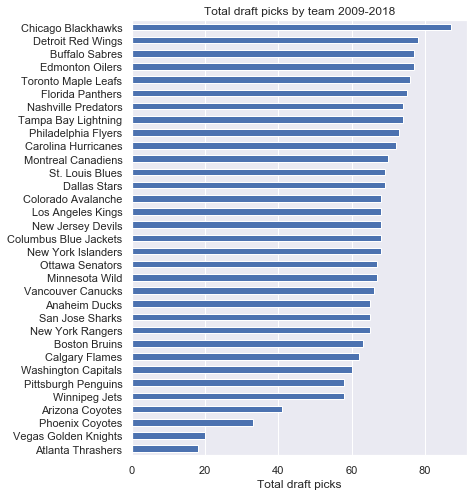

In [160]:
ax = df['Team'].value_counts().sort_values()\
    .plot(kind='barh', figsize=(6, 8),
          title='Total draft picks by team 2009-2018')
ax.set_xlabel("Total draft picks")
ax.grid(axis='y')

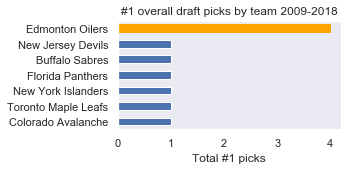

In [161]:
mask = df['Overall'] == 1
ax = df.loc[mask, 'Team'].value_counts().sort_values()\
        .plot(kind='barh', figsize=(4, 2),
              title='#1 overall draft picks by team 2009-2018');
ax.get_children()[6].set_color('orange')
ax.set_xlabel("Total #1 picks")
ax.grid(False);

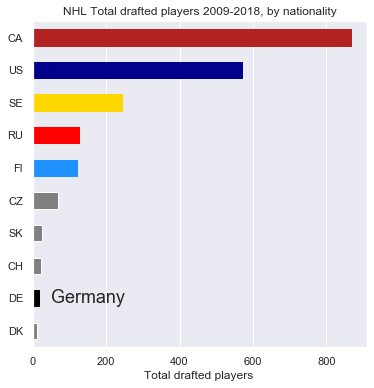

In [162]:
ax = df['Nat.'].value_counts()\
    .sort_values().tail(10)\
    .plot(kind='barh', figsize=(6, 6), color='gray',
          title='NHL Total drafted players 2009-2018, by nationality')
ax.get_children()[9].set_color('firebrick')
ax.get_children()[8].set_color('darkblue')
ax.get_children()[7].set_color('gold')
ax.get_children()[6].set_color('red')
ax.get_children()[5].set_color('dodgerblue')
ax.get_children()[1].set_color('black')
ax.text(50, 1, "Germany", fontsize=18, va='center')
ax.grid(axis='y')
ax.set_xlabel("Total drafted players ");

In [ ]:
mask = df['Overall'] == 1
ax = df.loc[mask, 'Nat.'].value_counts()\
    .sort_values().tail(10)\
    .plot(kind='barh', figsize=(6, 6), color='gray',
          title='NHL Total drafted players 2009-2018, by nationality')
ax.get_children()[4].set_color('firebrick')
ax.get_children()[1].set_color('darkblue')
ax.get_children()[3].set_color('gold')
ax.get_children()[2].set_color('red')
ax.get_children()[0].set_color('tomato')
ax.grid(axis='y')
ax.set_xlabel("Total drafted players ")
ax.text(1.5, 0, "Nico Hischier, Switzerland"
                "\ndrafted #1 overall in 2017",
                fontsize=14, va='center');

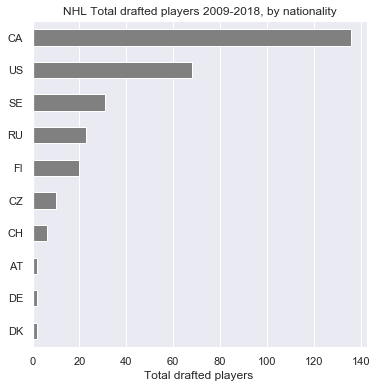

In [199]:
mask = df['round'] == 1
ax = df.loc[mask, 'Nat.'].value_counts()\
    .sort_values().tail(10)\
    .plot(kind='barh', figsize=(6, 6), color='gray',
          title='NHL Total drafted players 2009-2018, by nationality')
#ax.get_children()[4].set_color('firebrick')
#ax.get_children()[1].set_color('darkblue')
#ax.get_children()[3].set_color('gold')
#ax.get_children()[2].set_color('red')
#ax.get_children()[0].set_color('tomato')
ax.grid(axis='y')
ax.set_xlabel("Total drafted players ");